In [5]:
# Data Set used is the Boston Housing Prices data set.
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data,boston.target,random_state=1)

(506, 13)
(506,)


In [6]:
# Create the model and fit the data
from sklearn.ensemble import RandomForestRegressor as RFR



n_estimators = [10,20,50,80,100,200]
oob_errors = []



for n in n_estimators:
    rfr = RFR(n_estimators=n, criterion="mse", max_depth=None, min_samples_split=2, min_samples_leaf=1,
                      min_weight_fraction_leaf=0.0, max_features="auto", max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None,
                      bootstrap=True, oob_score=True, n_jobs=6, random_state=1, verbose=1, warm_start=False)

    rfr.fit(X_train,y_train)
    #y_pred = bag_reg.predict(X_test)
    oob_errors.append(rfr.oob_score_)
    

[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.0s finished
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Don

In [7]:
print(oob_errors)

[0.70841974028923604, 0.82493356091105707, 0.8484424338944655, 0.85443738148805037, 0.85564617748242577, 0.85867445504501738]


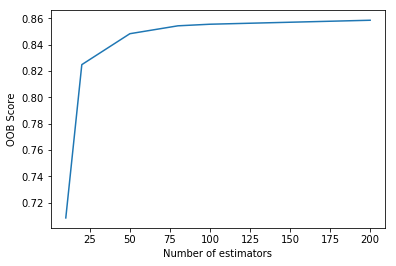

In [8]:
# plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_estimators,oob_errors)
plt.xlabel("Number of estimators")
plt.ylabel("OOB Score")
plt.show()
